In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Continent:
    def __init__(self, name, alcohol=0):
        self.name = name
        self.alcohol = alcohol

In [3]:
def draw_plot(x,y,x_avg,y_avg,mean_alc):
    plt.figure().set_figwidth(20)
    plt.xticks(rotation=90)

    plt.plot(x_avg, y_avg, color='black', linestyle='dashed', linewidth=2)
    bars = plt.bar(x,y)

    for bar in bars:
        if bar.get_height() < mean_alc:
            bar.set_color('blue')
        else:
            bar.set_color('brown')

    plt.xlabel('Countries', fontdict={'size':30})
    plt.ylabel('Total litries of alcohol', fontdict={'size':20})
    
    plt.show()

In [4]:
def add_continent(continents, new_continent):
    for continent in continents:
        if continent[0] == new_continent:
            return continents
    continents.append([new_continent, 0])
    return continents

In [5]:
alcohol = pd.read_csv('./alcohol/drinks.csv')
alcohol[['country', 'beer_servings']].iloc[:5]

,country,beer_servings
0,Afghanistan,0
1,Albania,89
2,Algeria,25
3,Andorra,245
4,Angola,217


In [6]:
alcohol.groupby('country').mean().sort_values('beer_servings', ascending=False).head(10)

,index,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,,
Namibia,117.0,376.0,3.0,1.0,6.8
Czech Republic,45.0,361.0,170.0,134.0,11.8
Gabon,62.0,347.0,98.0,59.0,8.9
Germany,65.0,346.0,117.0,175.0,11.3
Lithuania,98.0,343.0,244.0,56.0,12.9
Poland,135.0,343.0,215.0,56.0,10.9
Venezuela,188.0,333.0,100.0,3.0,7.7
Ireland,81.0,313.0,118.0,165.0,11.4
Palau,129.0,306.0,63.0,23.0,6.9


### Ranking in every country total sum of consuming litres of alcohol

In [7]:
alcohol['total'] = alcohol.iloc[:, 2:-1].sum(axis=1)
ranking = alcohol.sort_values('total', ascending=False)
ranking.iloc[:10]

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,total
3,3,Andorra,245,138,312,12.4,695
68,68,Grenada,199,438,28,11.9,665
45,45,Czech Republic,361,170,134,11.8,665
61,61,France,127,151,370,11.8,648
141,141,Russian Federation,247,326,73,11.5,646
98,98,Lithuania,343,244,56,12.9,643
99,99,Luxembourg,236,133,271,11.4,640
65,65,Germany,346,117,175,11.3,638
75,75,Hungary,234,215,185,11.3,634
135,135,Poland,343,215,56,10.9,614


In [8]:
mean_alc = alcohol['total'].mean()

In [9]:
# First half of countries
x1 = alcohol['country'].iloc[:int(len(alcohol)/2)]
y1 = alcohol['total'].iloc[:int(len(alcohol)/2)]

# Second half of countries
x2 = alcohol['country'].iloc[int(len(alcohol)/2):]
y2 = alcohol['total'].iloc[int(len(alcohol)/2):]


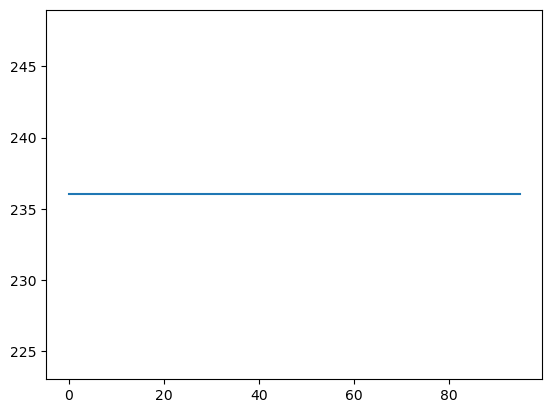

In [10]:
x_avg = np.arange(0,int(len(alcohol)/2))
y_avg = np.full_like(x_avg, mean_alc)
plt.plot(x_avg, y_avg)

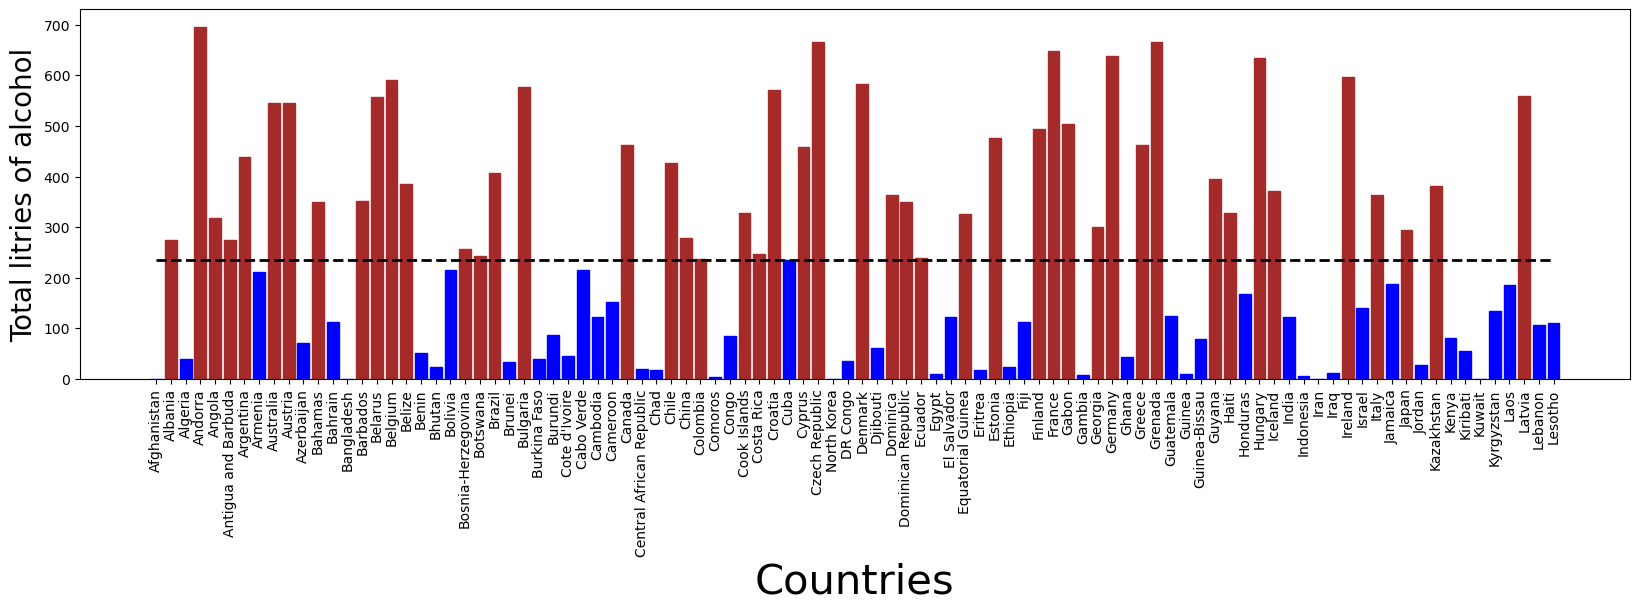

In [11]:
draw_plot(x1, y1, x_avg, y_avg, mean_alc)

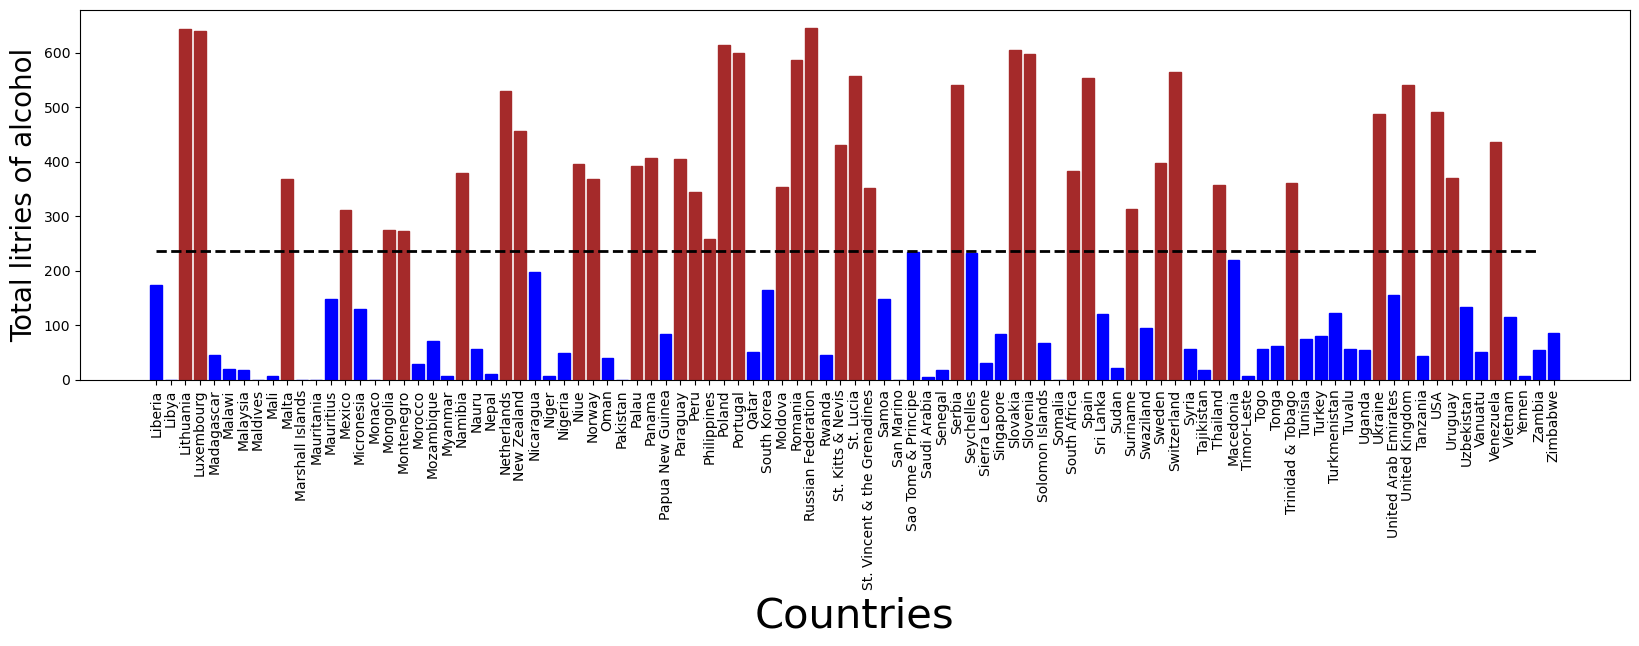

In [12]:
draw_plot(x2, y2, x_avg, y_avg, mean_alc)

In [13]:
life_exp = pd.read_csv('./alcohol/lifeexpectancy-verbose.csv')
countires = life_exp[['CountryDisplay', 'RegionDisplay']]
a = countires.loc[life_exp['CountryDisplay'] == "Poland"].iloc[:1]

print(a.iloc[0]['RegionDisplay'])

Europe


In [14]:
# countires.loc[life_exp['CountryDisplay'] == "Antigua and Barbuda"]

In [15]:
continents = []

for country in alcohol['country']:
#     print(f"{region}, {country}\n")
    region = countires.loc[life_exp['CountryDisplay'] == country].iloc[:1]
    if not len(region):
        continue
    region = region.iloc[0]['RegionDisplay']
    add_continent(continents, region)
        
    for i in range(len(continents)):
        if continents[i][0] == region:
            total = alcohol.loc[alcohol['country'] == country]
            total = total.iloc[0]['total']
            continents[i][1]+=total
                
            

In [16]:
continents.sort(reverse=True, key = lambda continent: continent[1])
print(continents)

[['Europe', 21372], ['Americas', 9105], ['Africa', 4352], ['Western Pacific', 4139], ['Eastern Mediterranean', 710], ['South_East Asia', 647]]


([<matplotlib.patches.Wedge at 0x2106e8f3400>,
 [Text(-0.1129066030562022, 1.1946765666850212, 'Europe'),
  Text(-0.6856666214830928, -0.8601518959950977, 'Americas'),
  Text(0.40330291435101123, -1.023399608792177, 'Africa'),
  Text(0.9469142877633402, -0.5597797170580998, 'Western Pacific'),
  Text(1.0866208778690998, -0.17104112891052606, 'Eastern Mediterranean'),
  Text(1.0986028825925653, -0.055422976817435375, 'South_East Asia')],
 [Text(-0.06586218511611794, 0.6968946638995955, '53.0%'),
  Text(-0.3739999753544142, -0.4691737614518714, '22.6%'),
  Text(0.21998340782782427, -0.5582179684320966, '10.8%'),
  Text(0.5164987024163673, -0.30533439112259986, '10.3%'),
  Text(0.5927022970195089, -0.0932951612239233, '1.8%'),
  Text(0.5992379359595811, -0.03023071462769202, '1.6%')])

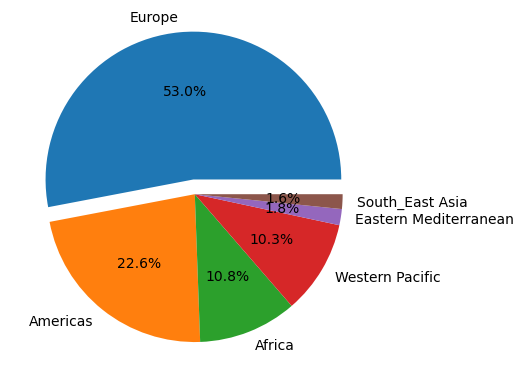

In [17]:
x = [continents[i][0] for i in range(len(continents))]
y = [continents[i][1] for i in range(len(continents))]
explode = (0.1,0,0,0,0,0)
plt.pie(y, labels=x,explode=explode, autopct='%1.1f%%')

In [53]:
life_exp.groupby('RegionDisplay').max('YearCode')['Numeric']

RegionDisplay
Africa                   78.48976
Americas                 84.01681
Eastern Mediterranean    82.17039
Europe                   86.00000
South_East Asia          79.00000
Western Pacific          87.15457
Name: Numeric, dtype: float64

In [38]:
life_exp.loc[(life_exp['SexDisplay']=='Male') & (life_exp['CountryDisplay']=='Poland')
            &(life_exp['WorldBankIncomeGroupDisplay']) & (life_exp['YearCode'] >= 2000)].count()

index                            7
GhoCode                          7
GhoDisplay                       7
PublishStateCode                 7
PublishStateDisplay              7
YearCode                         7
YearDisplay                      7
RegionCode                       7
RegionDisplay                    7
WorldBankIncomeGroupGroupCode    7
WorldBankIncomeGroupDisplay      7
CountryCode                      7
CountryDisplay                   7
SexCode                          7
SexDisplay                       7
DisplayValue                     7
Numeric                          7
dtype: int64

In [25]:
life_exp.iloc[:3]

,index,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
0,0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,1990,1990,AMR,Americas,WB_LMI,Lower_middle_income,NIC,Nicaragua,MLE,Male,68,68.0
1,1,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),PUBLISHED,Published,2012,2012,EUR,Europe,WB_HI,High_income,IRL,Ireland,MLE,Male,69,69.3
2,2,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,EMR,Eastern Mediterranean,WB_LI,Low_income,YEM,Yemen,BTSX,Both sexes,61,61.0
